<h1>RES-NET<h1>

C:\Users\ramav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.5580 - loss: 1.4105 - val_accuracy: 0.8140 - val_loss: 0.6057
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7781 - loss: 0.6373 - val_accuracy: 0.8590 - val_loss: 0.4226
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8134 - loss: 0.5300 - val_accuracy: 0.8300 - val_loss: 0.4561
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.8410 - loss: 0.4617 - val_accuracy: 0.8280 - val_loss: 0.4334
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.8446 - loss: 0.4462 - val_accuracy: 0.8600 - val_loss: 0.3722
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.8654 - loss: 0.3689 - val_accuracy: 0.8410 - val_loss: 0.4310
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.8667 - loss: 0.3606 - val_accuracy: 0.8460 - val_loss: 0.3906
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.8898 - loss: 0.3305 - val_a

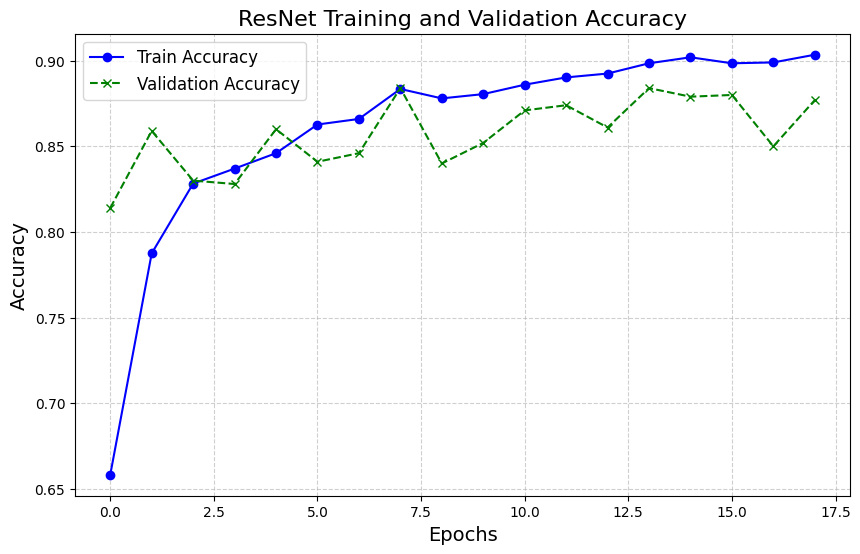

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
ResNet Classification Report:
              precision    recall  f1-score   support

      Broken       0.84      0.88      0.86       201
    Immature       0.90      0.90      0.90       225
      Intact       0.87      0.93      0.90       241
Skin-Damaged       0.92      0.85      0.89       226
     Spotted       0.89      0.84      0.87       107

    accuracy                           0.88      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load extracted features from DenseNet
densenet_train_features, train_labels, densenet_test_features, test_labels = joblib.load('densenet_features.joblib')

# ResNet-based Model Architecture
resnet_classifier = Sequential([
    Dense(1024, activation='relu', input_shape=(1024,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

resnet_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and model saving
resnet_checkpoint = ModelCheckpoint('resnet.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# Train the ResNet model using DenseNet features
resnet_history = resnet_classifier.fit(
    densenet_train_features, train_labels,
    epochs=50,
    validation_data=(densenet_test_features, test_labels),
    callbacks=[resnet_checkpoint, early_stop]
)

# Plotting accuracy graphs for ResNet
plt.figure(figsize=(10, 6))  # Increase figure size for better clarity
plt.plot(resnet_history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='--', marker='x')
plt.title('ResNet Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.show()


# Classification Report for ResNet
resnet_predictions = resnet_classifier.predict(densenet_test_features)
resnet_pred_labels = resnet_predictions.argmax(axis=1)
print("ResNet Classification Report:")
print(classification_report(test_labels.argmax(axis=1), resnet_pred_labels, target_names=['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']))


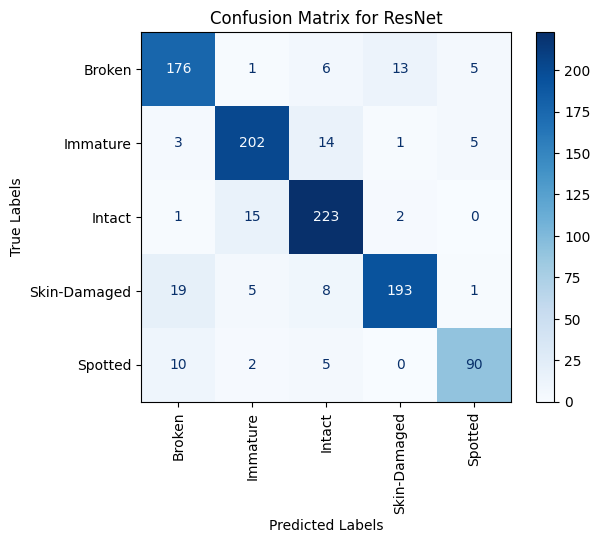

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix for ResNet predictions
conf_matrix_resnet = confusion_matrix(test_labels.argmax(axis=1), resnet_pred_labels)

# Define class names (adjust according to your classes)
class_names = ['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']

# Visualize the confusion matrix
disp_resnet = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_resnet, display_labels=class_names)
disp_resnet.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Add title and labels
plt.title("Confusion Matrix for ResNet")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()
